Perform Sentiment Analysis in the network graph using RNN.

In [2]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
vocab_size = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [3]:
word_idx = imdb.get_word_index()
word_idx = {i: word for word, i in word_idx.items()}
 
# again printing the review
print([word_idx[i] for i in x_train[0]])

['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', '70s', 'and', 'with', 'heart', 'had', 'shadows', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', 'does', 'when', 'from', 'why', 'what', 'have', 'critics', 'they'

In [4]:
print("Max length of a review:: ", len(max((x_train+x_test), key=len)))
print("Min length of a review:: ", len(min((x_train+x_test), key=len)))

Max length of a review::  2697
Min length of a review::  70


In [6]:
from tensorflow.keras.preprocessing import sequence
max_words = 400
 
x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)
 
x_valid, y_valid = x_train[:64], y_train[:64]
x_train_, y_train_ = x_train[64:], y_train[64:]

In [7]:
embd_len = 32
 
# Creating a RNN model
RNN_model = Sequential(name="Simple_RNN")
RNN_model.add(Embedding(vocab_size,
                        embd_len,
                        input_length=max_words))
 
# In case of a stacked(more than one layer of RNN)
# use return_sequences=True
RNN_model.add(SimpleRNN(128,
                        activation='tanh',
                        return_sequences=False))
RNN_model.add(Dense(1, activation='sigmoid'))
 
 

In [8]:
# Compiling model
RNN_model.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)
 
# Training the model
history = RNN_model.fit(x_train_, y_train_,
                        batch_size=64,
                        epochs=5,
                        verbose=1,
                        validation_data=(x_valid, y_valid))



Epoch 1/5


390/390 [==============================] - 30s 73ms/step - loss: 0.6891 - accuracy: 0.5340 - val_loss: 0.6776 - val_accuracy: 0.5938
Epoch 2/5
390/390 [==============================] - 29s 75ms/step - loss: 0.6156 - accuracy: 0.6521 - val_loss: 0.6207 - val_accuracy: 0.6719
Epoch 3/5
390/390 [==============================] - 29s 75ms/step - loss: 0.5106 - accuracy: 0.7573 - val_loss: 0.6312 - val_accuracy: 0.7188
Epoch 4/5
390/390 [==============================] - 28s 71ms/step - loss: 0.5501 - accuracy: 0.7145 - val_loss: 0.6028 - val_accuracy: 0.7344
Epoch 5/5
390/390 [==============================] - 29s 73ms/step - loss: 0.4773 - accuracy: 0.7727 - val_loss: 0.6228 - val_accuracy: 0.6875

Simple_RNN Score--->  [0.5825108289718628, 0.7020400166511536]


In [9]:
# printing model summary
print(RNN_model.summary())

Model: "Simple_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 32)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               20608     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 180737 (706.00 KB)
Trainable params: 180737 (706.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


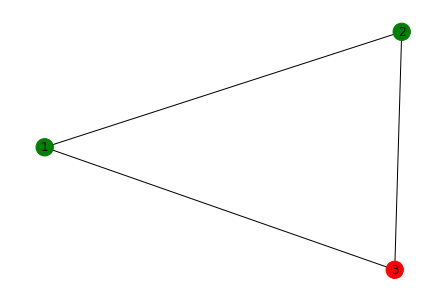

In [4]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3)])
G.nodes[1]['text'] = "This movie is great!"
G.nodes[2]['text'] = "I didn't like this movie."
G.nodes[3]['text'] = "The plot was confusing."


# Perform sentiment analysis on text associated with nodes
for node in G.nodes():
    text = G.nodes[node]['text']
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    G.nodes[node]['sentiment'] = sentiment_score

# Visualize the network graph with node colors based on sentiment
sentiment_colors = {node: 'green' if score >= 0 else 'red' for node, score in nx.get_node_attributes(G, 'sentiment').items()}
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=[sentiment_colors[node] for node in G.nodes()])
plt.show()
